In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pwd

'/Users/Yohann/code/YohannD/riiid-project/notebooks'

In [4]:
data = pd.read_csv('../raw_data/train_1M.csv')
df = data.copy()

In [243]:
df[df['prior_question_had_explanation']==False].count()

Unnamed: 0                        113073
row_id                            113073
timestamp                         113073
user_id                           113073
content_id                        113073
content_type_id                   113073
task_container_id                 113073
user_answer                       113073
answered_correctly                113073
prior_question_elapsed_time        93638
prior_question_had_explanation    113073
dtype: int64

In [128]:
df.answered_correctly.value_counts()

 1    635571
 0    332263
-1     19435
Name: answered_correctly, dtype: int64

In [162]:
df.prior_question_had_explanation.value_counts()

True     870275
False    113073
Name: prior_question_had_explanation, dtype: int64

In [142]:
df[df['answered_correctly'] == -1].groupby('user_id').answered_correctly.sum().mean()

-12.786184210526315

In [6]:
df.shape

(987269, 11)

# Explore users

In [296]:
nb_users = df.user_id.nunique()
nb_answers_per_user = df[df['content_type_id'] == 0].groupby('user_id').row_id.count().round()
nb_lectures_per_user = df.groupby('user_id').content_type_id.sum().round()
nb_answers_mean = df[df['answered_correctly'] >= 0].groupby('user_id').answered_correctly.sum().mean().round()
nb_answers_max =  df[df['answered_correctly'] >= 0].groupby('user_id').answered_correctly.sum().max().round()
nb_lectures_mean = df[df['content_type_id'] == 1].groupby('user_id').row_id.count().mean().round()
nb_lectures_max = df[df['content_type_id'] == 1].groupby('user_id').row_id.count().max().round()
avg_score = ((df[df['answered_correctly'] >= 0].groupby('user_id').answered_correctly.sum() / df[df['answered_correctly'] >= 0].groupby('user_id').answered_correctly.count()).mean()*100).round()
avg_score_per_user = ((df[df['answered_correctly'] >= 0].groupby('user_id').answered_correctly.sum() / df[df['answered_correctly'] >= 0].groupby('user_id').answered_correctly.count())*100).round()
max_time_spent = (df.groupby('user_id').timestamp.max().max()/3600000).round()
mean_time_spent = (df.groupby('user_id').timestamp.max().mean()/3600000).round()

In [297]:
nb_lectures_per_user

user_id
1710599        0
1906069        0
2101969       12
2198581        0
2381110        1
3763060        8
4580228        0
5256034        5
5745276        2
5766705        2
5987022        0
6324620        0
6932476        0
7408877        0
7993478        0
8048242       11
8968814        1
10879629       0
11036207       0
12002096       0
13401374       0
15388756      37
15680803       0
15954421       0
16097978       0
16452690       0
17045043       0
17926202       2
18066275       2
18733142       0
              ..
2134488088     0
2134593978     0
2135262756     0
2136151042     0
2136431267     0
2138364452     0
2138630601    10
2139300906     0
2139382730     0
2139891146     0
2140062901     2
2140400537     0
2140692639     0
2140730411     0
2141200021     0
2141203754    12
2141359238     1
2141834251     0
2142376280    44
2143704701    20
2144119140     0
2144418693     1
2144555928     0
2145039135    50
2145059952     1
2145253714    32
2145343445     0
214538

/Users/Yohann/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  This is separate from the ipykernel package so we can avoid doing imports until


(2.984930890941384, 1000)

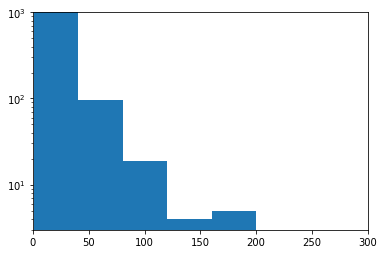

In [220]:
plt.hist(nb_lectures_per_user, log=True, bins=5)
plt.xlim(0,300)
plt.ylim(0,1000)

(array([ 459.,  971., 1560.,  781.,   45.]),
 array([ 21. ,  36.8,  52.6,  68.4,  84.2, 100. ]),
 <BarContainer object of 5 artists>)

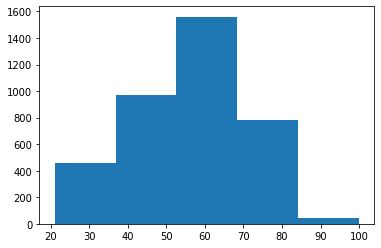

In [239]:
nb_answers_per_user
nb_answers_per_user
plt.hist(avg_score_per_user.where(avg_score_per_user>20), 5)

In [283]:
print('Number of users:', nb_users)
print('Mean users answered correctly', nb_answers_mean, 'questions.')
print('Users at most answered correctly', nb_answers_max, 'questions.')
print('Mean users took', nb_lectures_mean, 'lectures.')
print('Users at most answered took', nb_lectures_max, 'lectures.')
print('Users average score is', avg_score, '%.')
print('User max time spent on app:', max_time_spent, 'h.')
print('User mean time spent on app:', mean_time_spent, 'h.')



Number of users: 3935
Mean users answered correctly 162.0 questions.
Users at most answered correctly 8919 questions.
Mean users took 13.0 lectures.
Users at most answered took 200 lectures.
Users average score is 55.0 %.
User max time spent on app: 22437.0 h.
User mean time spent on app: 1518.0 h.


Text(0.5, 1.0, 'Average scores')

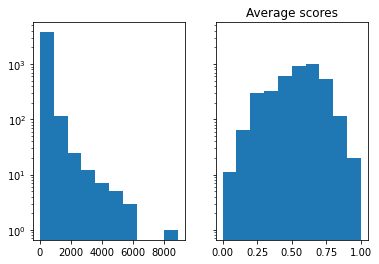

In [284]:
#fig, axs = plt.subplots(2, 2)
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.hist(df[df['answered_correctly'] >= 0].groupby('user_id').answered_correctly.sum(), log=True, bins=10, label='Correctly answered questions')
#plt.title('Correctly answered questions')

ax2.hist(df[df['answered_correctly'] >= 0].groupby('user_id').answered_correctly.sum() / df[df['answered_correctly'] >= 0].groupby('user_id').answered_correctly.count(), log=True, bins=10)
plt.title('Average scores')

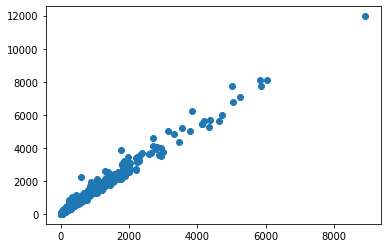

In [156]:
plt.scatter(df[df['answered_correctly'] >= 0].groupby('user_id').answered_correctly.sum(), df[df['answered_correctly'] >= 0].groupby('user_id').answered_correctly.count())




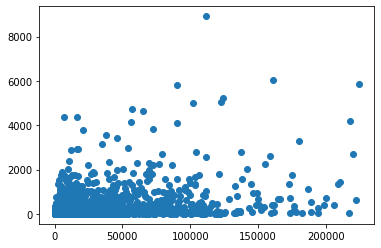

In [161]:
plt.scatter(df[df['answered_correctly'] >= 0].groupby('user_id').timestamp.max()/360000, df[df['answered_correctly'] >= 0].groupby('user_id').answered_correctly.sum())

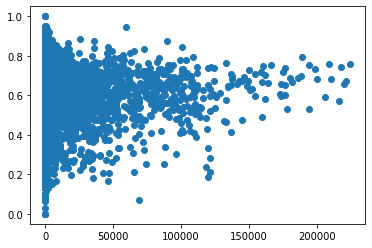

In [163]:
plt.scatter(df[df['answered_correctly'] >= 0].groupby('user_id').timestamp.max()/360000, df[df['answered_correctly'] >= 0].groupby('user_id').answered_correctly.sum() / df[df['answered_correctly'] >= 0].groupby('user_id').answered_correctly.count())



## Users breakdown per time spent on app

In [ ]:
df.qcut

In [251]:
users_one_w = df[df['timestamp'] <= 6.048e+8]
users_one_m = df[df['timestamp'] <= 2.628e+9]
users_six_m = df[df['timestamp'] <= 1.577e+10]
users_one_y = df[df['timestamp'] <= 3.154e+10]
users_over_one_y = df[df['timestamp'] > 3.154e+10]
users_over_two_y = df[df['timestamp'] > 3.154e+10]

In [257]:
print('One week users:', users_one_w.groupby('user_id').count().shape)
print('One month users:', users_one_m.groupby('user_id').count().shape)
print('Six months users:', users_six_m.groupby('user_id').count().shape)
print('One year users:', users_over_one_y.groupby('user_id').count().shape)

One week users: (3935, 10)
One month users: (3935, 10)
Six months users: (3935, 10)
One year users: (183, 10)


In [356]:
use_time = [users_one_m, users_one_w, users_one_y, users_over_one_y]

for user in use_time:
    print('Average score per user:',((user[user['answered_correctly'] >= 0].groupby('user_id').answered_correctly.cumsum() / (user[user['answered_correctly'] >= 0].groupby('user_id').answered_correctly.count())*100)).mean())





Average score per user: nan
Average score per user: nan
Average score per user: nan
Average score per user: nan


## Users breakdown per average score

/Users/Yohann/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/Yohann/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 459.,  971., 1560.,  781.,   45.]),
 array([ 21. ,  36.8,  52.6,  68.4,  84.2, 100. ]),
 <BarContainer object of 5 artists>)

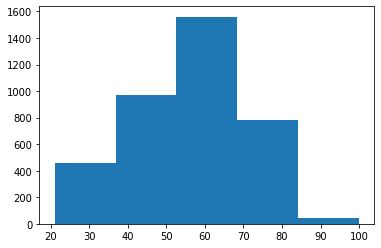

In [267]:
#users_25p = df[df['timestamp'] <= 6.048e+8]
#users_50p = df[df['timestamp'] <= 2.628e+9]
#users_75p = df[df['timestamp'] <= 1.577e+10]

plt.hist(avg_score_per_user.where(avg_score_per_user>20), 5)


(0.0, 200.0)

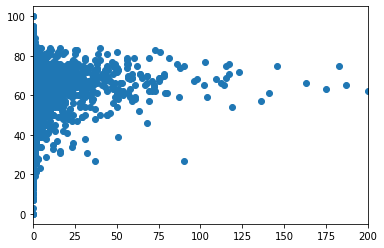

In [294]:
# avg score depending on how many lectures seen  
plt.scatter(df.groupby('user_id').content_type_id.sum().round(), avg_score_per_user)
plt.xlim(0,200)

In [292]:
avg_score_per_user.shape

(3935,)

In [287]:
.shape

(3935,)

In [314]:
(df.groupby('user_id').content_type_id.sum()==0).sum()

2415

In [331]:
questions = df.query('content_type_id==0')
lectures = df.query('content_type_id==1')

In [336]:
df['user_activity_cumcount']=df.groupby('user_id').cumcount()

In [340]:
df['days_on_the_app']=df.groupby('user_id').timestamp.max()

In [351]:
df.head()

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,user_activity_cumcount,user_score_cumsum
row_id,,,,,,,,,,,
90286654,0,1917429896,7900,0,0,0,1,NaN,NaN,0,1
90286655,26511,1917429896,7876,0,1,2,0,21000.0,False,1,1
90286656,55312,1917429896,175,0,2,0,0,21000.0,False,2,1
90286657,102436,1917429896,1278,0,3,0,0,23000.0,False,3,1
90286658,188454,1917429896,2063,0,4,3,0,45000.0,False,4,1


In [354]:
df.groupby('user_id').timestamp.